In [1]:
import pandas as pd
import os
from tqdm import tqdm
import spacy
from spacy.tokens import DocBin
import json


#nlp = spacy.blank("en") # load a new spacy model
# load other spacy model
# nlp = spacy.load("en")
nlp = spacy.load("en_core_web_lg")
# doc = nlp("Twitter induces damage and injuries reported in Alabama's Morgan County as storms sweeps through state") 
# # spacy.displacy.render(doc, style="ent", jupyter=True)


db = DocBin() # create a DocBin object

with open('dataset1.json','r') as f:
    data=json.load(f)

data = data['annotations']

with open('dataset2.json','r') as f:
    data1=json.load(f)

with open('more1.json','r') as f:
    moredata=json.load(f)
moredata=moredata['annotations']

with open('more.json','r') as f:
    moredata1=json.load(f)

moredata1=moredata1['annotations']   

moredata1=moredata1+moredata

with open('dataset3.json','r') as f:
    aka3=json.load(f)

aka3 = aka3['annotations']

with open('dataset4.json','r') as f:
    aka4=json.load(f)    

aka4 = aka4['annotations']

aka4=aka4+aka3

with open('dataset5.json','r') as f:
    yo=json.load(f)

yo = yo['annotations']


data=data + data1["annotations"] + moredata1 +aka4 + yo   

for text, annot in tqdm(data): # data in previous format
    doc = nlp.make_doc(text) # create doc object from text
    ents = []
    for start, end, label in annot["entities"]: # add character indexes
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents # label the text with the ents
    db.add(doc)

os.chdir(r'D:/MSHackathon')
db.to_disk("./train.spacy") # save the docbin object

100%|██████████| 103/103 [00:00<00:00, 885.50it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity


In [2]:
!python -m spacy init fill-config base_config.cfg config.cfg
!python -m spacy train config.cfg --output ./output --paths.train ./train.spacy --paths.dev ./train.spacy

✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy
ℹ Saving to output directory: output
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     36.83    0.00    0.00    0.00    0.00
 13     200         65.61   1093.52   98.51   99.00   98.02    0.99
 29     400         36.91    140.10   99.01   99.01   99.01    0.99
 49     600         25.11     90.21   99.01   99.01   99.01    0.99
 73     800         23.76     80.84   99.01   99.01   99.01    0.99
103    1000         12.09     65.39 

[2023-01-17 17:53:13,808] [INFO] Set up nlp object from config
[2023-01-17 17:53:13,819] [INFO] Pipeline: ['tok2vec', 'ner']
[2023-01-17 17:53:13,822] [INFO] Created vocabulary
[2023-01-17 17:53:18,279] [INFO] Added vectors: en_core_web_lg
[2023-01-17 17:53:27,524] [INFO] Finished initializing nlp object
[2023-01-17 17:53:28,304] [INFO] Initialized pipeline components: ['tok2vec', 'ner']


In [3]:
# import json
# with open('annotations.json','r') as f:
#     data=json.load(f)

# print(data['annotations'][0])    

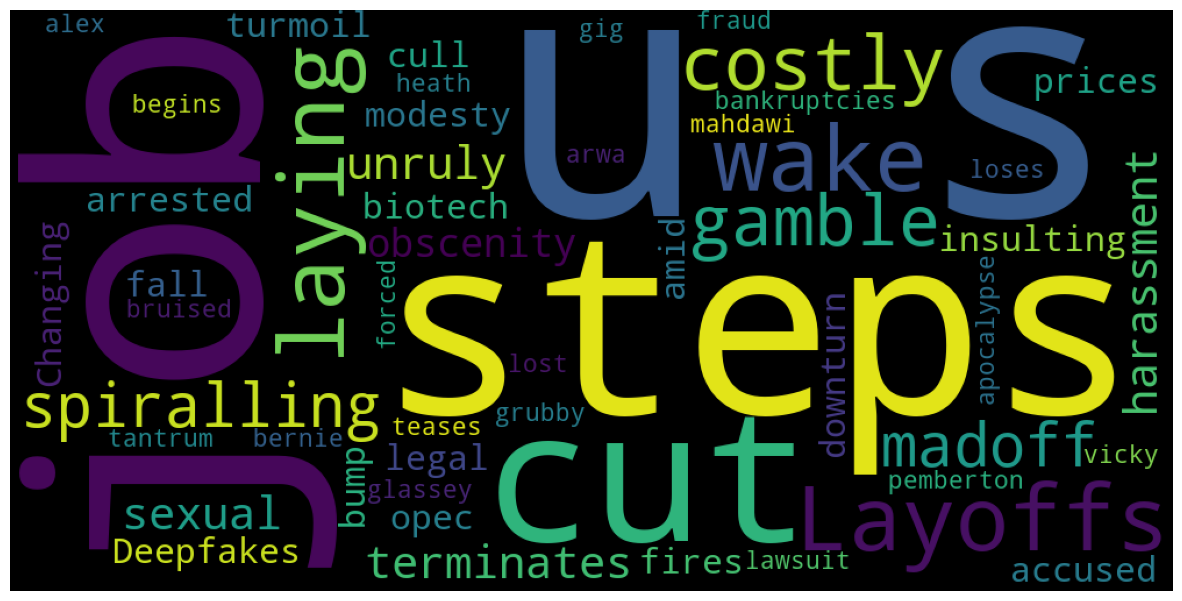

In [4]:

import spacy
nlp = spacy.load(r"./output/model-best")

doc = nlp("""Breakingviews - Wells Fargo labors under $100 bln sin discount - Reuters
Wells Fargo terminates employee over unruly behaviour on Air India ... - Reuters India
Former Wells Fargo VP faces charges of sexual harassment, obscenity, and 'insulting the modesty' of a 72-year-old woman after officials say he drunkenly peed on her during a flight
Wells Fargo VP Fired For Allegedly 'Urinating' On Plane Passenger
Wells Fargo Will Step Back From This Key Industry, Reportedly Conduct Layoffs
Wells Fargo fires VP who peed on another passenger during an international air flight
Researcher Deepfakes His Voice, Uses AI to Demand Refund From Wells Fargo
Wells Fargo Has Always Had a Smaller Investment Banking Operation. But That's Changing
Wells Fargo sacks employee accused of urinating on female co-passenger on Air India flight
What To Expect From Wells Fargo Stock In Q4?
Wells Fargo VP arrested, fired for urinating on airplane passenger: report - Fox Business
Wells Fargo, once a mortgage giant, shrinks home-lending business
goldman sachs raises $1.6 bln private capital for climate fund - reuters
Goldman Sachs raises $1.6 bln private capital for climate fund - Reuters
goldman sachs' consumer banking unit head steps down - memo - reuters.com
Goldman Sachs' consumer banking unit head steps down - memo - Reuters.com
opec pricing power limits downside risks to oil prices, goldman says - reuters
ex-goldman bankers tap linkedin, headhunters in frail financial jobs ... - reuters
goldman staff brace as global jobs cull begins - reuters
goldman job cuts begin with investment banking, global markets hit ... - reuters
phillips 66 expects tight gasoline, diesel supplies in summer ... - reuters
u.s. inflation reduction act-driven power projects expected to begin ... - reuters
fangtooth oil discovery may justify guyana's 7th platform, hess ceo - reuters
blackrock to cut up to 500 jobs amid market turmoil - insider - reuters
factbox: global banks cut jobs as cost pressures mount - reuters
u.s. banks get ready for shrinking profits and recession - reuters
u.s. rep. santos opens door to resignation - 'if 142 people 'ask' - reuters
column: is brazil another bric in the wall? - reuters
factbox: activist investor bluebell's offensive against european ... - reuters
debt bomb, biotech bump and a bond rally: 2023 money predictions - reuters
mercedes to launch vehicle-charging network, starting in north ... - reuters
florida legal market to expand again with mintz miami move - reuters.com
singapore withstands a global property downturn - reuters.com
shale producer pioneer expects opec to boost oil prices as brent ... - reuters
ces technology trade show adopts social theme - reuters
asian companies see earnings upgrades by analysts over the past ... - reuters
anti-esg drive in u.s. could have cost taxpayers up to $708 mln ... - reuters
breakingviews - disney's next 100 years hinges on a metaverse - reuters.com
asia shares rally on u.s. rate hopes, china reopening - reuters.com
morning bid: seeing through another shock - reuters.com
egypt's pound hits new lows after shift to more flexible forex regime - reuters
view u.s. consumer prices fall in december - reuters
analysis: investors brace for u.s. debt-ceiling fight after house ... - reuters
rebound in u.s. stocks faces earnings test - reuters
explainer: how strained china-australia relations hit trade in coal ... - reuters.com
factbox: the 10 biggest u.s. retail bankruptcies in 5 years - reuters
analysis: global hedge funds plan 2023 around inflation risk - reuters
disney ceo bob iger tells staff to return to office four days a week
george santos: brazil reactivates fraud case against fabulist congressman-elect
more republicans call for george santos to resign over fictional resumé
colbert on speaker votes: ‘pure uncut peruvian blue flake schadenfreude’
as an ex-bbc presenter, i want to hear a vision that goes beyond cut, cut, cut | roger bolton
eddie jones: ‘the mistakes i made with england – and why i got the sack’
seven ios features launching or expanding in 2023
wall street wipeout: thousands of jobs cut on brutal day for finance
goldman sachs has started laying off over 3,000 employees globally
Goldman Sachs has started laying off over 3,000 employees globally
layoffs are hitting wall street. here's what you can do to land on your feet if you lost your gig.
goldman sachs is reviewing spending on its private jets, which ceo david solomon has used for lavish getaways
Goldman Sachs is reviewing spending on its private jets, which CEO David Solomon has used for lavish getaways
goldman sachs forced to ax 3,200 jobs in wake of costly gamble on marcus diversification
Goldman Sachs forced to ax 3,200 jobs in wake of costly gamble on Marcus diversification
retail investors have sold all of the stocks they bought during the pandemic trading boom
gop rep. nancy mace says rep. george santos' 'entire résumé and life was manufactured' and that it will be 'very difficult to work with anyone who cannot be trusted'
disney ceo bob iger told staff they need to return to the office
google brings spatial audio to pixel 7 and pixel 6 phones
the verge launches “command line,” a newsletter about the tech industry’s inside conversation, by alex heath
finn wolfhard has sworn not to reveal the stranger things spin-off plot
zom 100 makes the zombie apocalypse into an office worker's godsend
razer's new head-tracking desktop soundbar ensures users always hear a full 3d audio effect
rrr star ntr jr. is ready anytime for the marvel cinematic universe
ant-man and the wasp: quantumania teases some obscure cameos
indiana jones hits the road in a new dial of destiny peek
netflix will stream a live awards show for the first time
Netflix will stream a live awards show for the first time
prince harry says he doesn't want history to repeat itself and 'to be a single dad'
greek trial of 24 rescuers who saved migrants in med begins
investors settle cyberpunk 2077 lawsuit with developer for $1.85 million
microsoft events to show new slate of games—including starfield
factbox: golden globe awards: full list of nominees - reuters
at ces 2023, sony's 'gran turismo' flags new entertainment strategy - reuters
'rrr' director s.s. rajamouli puts audience love before critical ... - reuters india
'banshees,' 'fabelmans' follow globes honors with sag nods - reuters
king charles makes first appearance since son harry's book - reuters uk
britain's bruised royals stay silent as prince harry lets 'light in on ... - reuters uk
futures muted ahead of key inflation data - reuters
internet providers warn against eu plans to make big tech cover … – reuters.com - inferse
build a new one
honor pad 8 review: this 12-inch budget tablet is great for multimedia
htc's new oculus quest competitor can be worn like a pair of glasses
here's how we hope the android world will improve in 2023
copenhagen cowboy review – nicolas winding refn’s scattershot netflix series
Copenhagen Cowboy review – Nicolas Winding Refn’s scattershot Netflix series
what’s on netflix and amazon this month – january
What’s on Netflix and Amazon this month – January
a four-day week? pick your pay? the bosses fighting to lure workers with the perfect job
‘spiralling out of control’: nick kyrgios comes clean to netflix and confirms comeback
‘Spiralling out of control’: Nick Kyrgios comes clean to Netflix and confirms comeback
zero-sum game: netflix’s break point aces the loneliness of top-flight tennis
Zero-sum game: Netflix’s Break Point aces the loneliness of top-flight tennis
‘he’s a financial serial killer’: how bernie madoff became the monster of wall street
culture secretary recommends dropping channel 4 privatisation plans, say reports
the lying life of adults review – another impeccable elena ferrante tv show
is harry the next james corden? the prince’s tv appearances, in order of greatness
uk’s top 10 singles of 2022 were all by british artists
what will harry do next? pr experts on the prince’s next steps
post your questions for patton oswalt
tv tonight: steve pemberton, bez and motsi mabuse amuse with tall tales
madoff: the monster of wall street review – grubby and jaw-dropping from start to finish
seinfeld, shootouts and haunted mansions: how jennifer coolidge became an icon at 61
vatican reopens investigation into teenager who went missing in 1983
‘let the fun begin!’ why did romance writer susan meachen fake her own death? | arwa mahdawi
the pale blue eye review – starry gothic mystery loses its way
inside the rapid rise and fall of a ‘squid game’ crypto scam
corsage review – vicky krieps mesmerises as a rebellious 19th-century royal
why a $67bn takeover could make microsoft a gaming behemoth
five easy ways to keep up with culture – that will actually stick
tesla stock has only plunged to a less ludicrous level as competitors catch up | nils pratley
ten minutes in and we were both crying: my toddler's first tantrum was the most awful hour of my life as a new parent | molly glassey        
under the ‘we pay, you entertain’ deal, harry is now the hardest working royal | martha gill
you can see why harry dislike""") # input sample text


spacy.displacy.render(doc, style="ent", jupyter=True)

my_list=[]

for ent in doc.ents:
  my_list.append(ent.text)
  # print(ent.text,ent.label_)

import matplotlib.pyplot as plt
from wordcloud import WordCloud



#convert list to string and generate
unique_string=(" ").join(my_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()